In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

### 1.散点图+分布图

In [20]:
rs = np.random.RandomState(2)
df = pd.DataFrame(rs.randn(200,2), columns = ['A','B'])

In [21]:
rs

RandomState(MT19937) at 0x1F61E8E7048

In [22]:
df.shape

(200, 2)

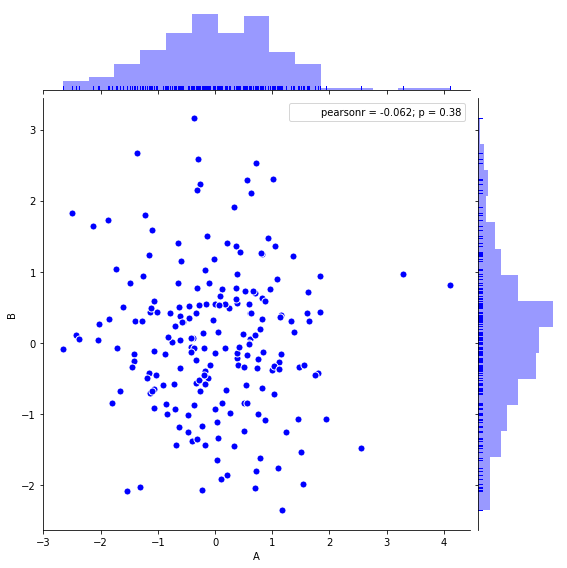

In [23]:
sns.jointplot(x=df['A'], y=df['B'], #设置xy轴，显示columns名称
              data = df,  #设置数据
              color = 'b', #设置颜色
              s = 50, edgecolor = 'w', linewidth = 1,#设置散点大小、边缘颜色及宽度(只针对scatter)
              stat_func=sci.pearsonr,
              kind = 'scatter',#设置类型：'scatter','reg','resid','kde','hex'
              #stat_func=<function pearsonr>,
              space = 0.1, #设置散点图和布局图的间距
              size = 8, #图表大小(自动调整为正方形))
              ratio = 5, #散点图与布局图高度比，整型
              marginal_kws = dict(bins=15, rug =True), #设置柱状图箱数，是否设置rug
              )

### 六边图（hex）

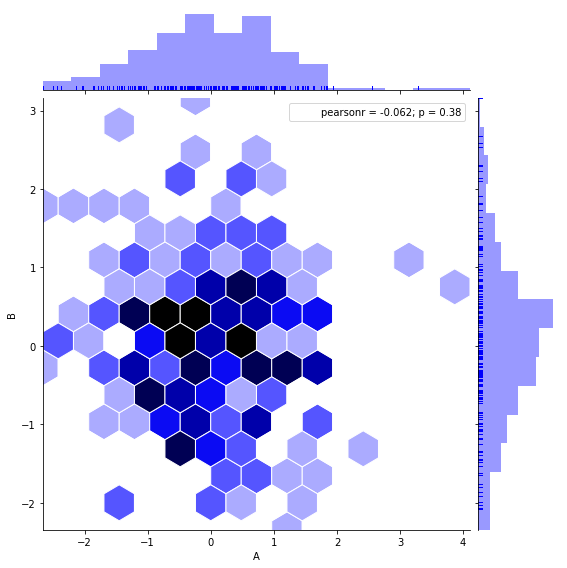

In [24]:
sns.jointplot(
              x=df['A'], y=df['B'], #设置xy轴，显示columns名称
              data = df,  #设置数据
              color = 'b', #设置颜色
              edgecolor = 'w', linewidth = 1,#设置散点大小、边缘颜色及宽度(只针对scatter)
              stat_func=sci.pearsonr,
              kind = 'hex',#设置类型：'scatter','reg','resid','kde','hex'
              space = 0.1, #设置散点图和布局图的间距
              size = 8, #图表大小(自动调整为正方形))
              ratio = 5, #散点图与布局图高度比，整型
              marginal_kws = dict(bins=15,rug=True) #设置柱状图箱数，是否设置rug
              )

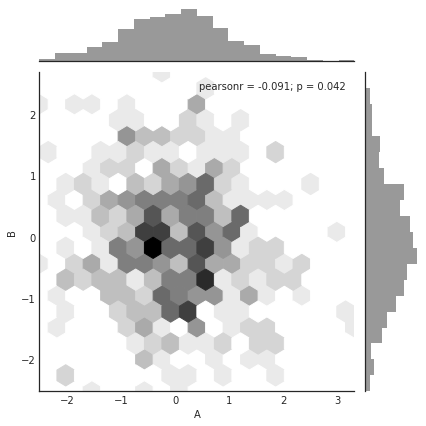

In [25]:
df = pd.DataFrame(rs.randn(500,2), columns = ['A', 'B'])
with sns.axes_style('white'):
    sns.jointplot(x=df['A'], y=df['B'], 
                  data = df, 
                  kind = 'hex',
                  color = 'k',
                  stat_func=sci.pearsonr,
                  marginal_kws = dict(bins = 20)
                 )

### 3.密度图（kde)

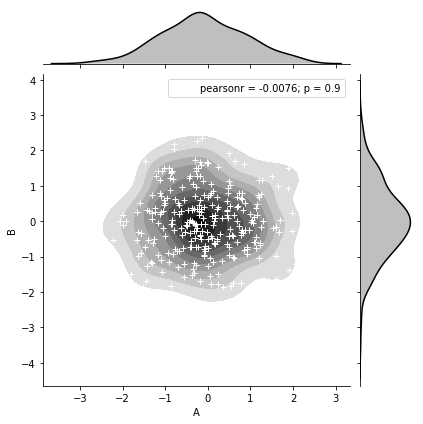

In [27]:
#创建数据
rs = np.random.RandomState(15)
df = pd.DataFrame(rs.randn(300,2), columns = ['A', 'B'])
#创建密度图
g = sns.jointplot(x = df['A'], y = df['B'], 
                  data = df,
                  kind = 'kde', color = 'k', 
                  stat_func= sci.pearsonr,
                  shade_lowest = False)
#添加散点图
g.plot_joint(plt.scatter, c = 'w', s = 30, linewidth = 1, marker='+')

### 4.可拆分的散点图

In [28]:
#设置风格
sns.set_style('white')
#导入数据
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


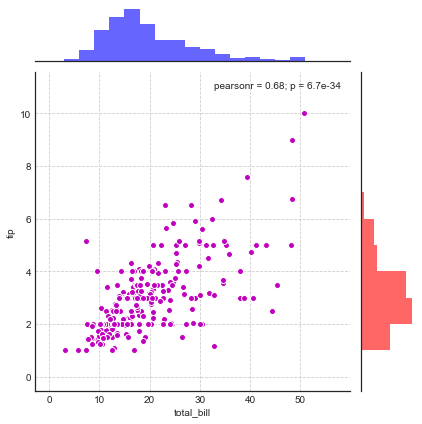

In [30]:
#创建一个绘图表格区域，设置好x,y对应数据
g = sns.JointGrid(x = 'total_bill', y = 'tip', data = tips)
g.plot_joint(plt.scatter, color = 'm', edgecolor = 'white') #设置框内图表，scatter
g.ax_marg_x.hist(tips['total_bill'], color='b', alpha = .6,
                 bins = np.arange(0,60,3))                  #设置x轴为直方图，注意bins是数组
g.ax_marg_y.hist(tips['tip'], color = 'r', alpha = .6,
                 orientation = 'horizontal',
                 bins = np.arange(0,12,1)) #设置x轴直方图，注意需要orientation参数
from scipy import stats
g.annotate(stats.pearsonr)
#设置标注，可以为pearsonar， spearmanr
plt.grid(linestyle = '--')

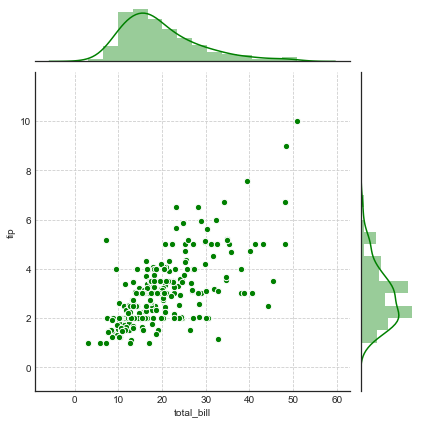

In [31]:
#创建一个绘图表格区域，设置好x,y对应数据
g = sns.JointGrid(x = 'total_bill', y = 'tip', data = tips)
g = g.plot_joint(plt.scatter, color = 'g', s = 40, edgecolor = 'white') #绘制散点图
plt.grid(linestyle = '--')
g.plot_marginals(sns.distplot, kde = True, color = 'g')   #绘制x，y直方图

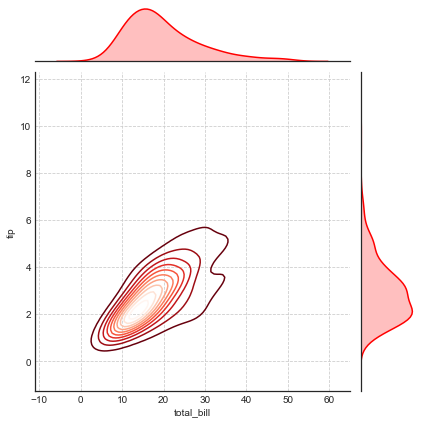

In [35]:
#创建一个绘图表格区域，设置好x,y对应数据
g = sns.JointGrid(x = 'total_bill', y = 'tip', data = tips)
g = g.plot_joint(sns.kdeplot,cmap = 'Reds_r')     #绘制密度图
plt.grid(linestyle = '--')
g.plot_marginals(sns.kdeplot, shade = True, color = 'r') #绘制x,y轴密度图

### 5.矩阵散点图

In [40]:
from sklearn import datasets
sns.set_style('white')
#读取数据
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


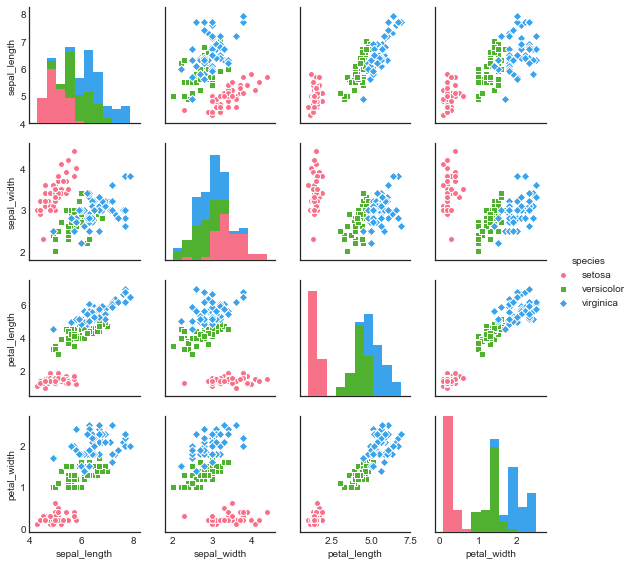

In [42]:
sns.pairplot(iris,
             kind = 'scatter', #散点图/回归分布图{'scatter', 'reg'})
             diag_kind = 'hist', #直方图/密度图{'hist'， 'kde'}
             hue = 'species',   #按照某一字段进行分类
             palette = 'husl',  #设置调色板
             markers = ['o', 's', 'D'], #设置不同系列的点样式（这里根据参考分类个数）
             size = 2, #图标大小
            )

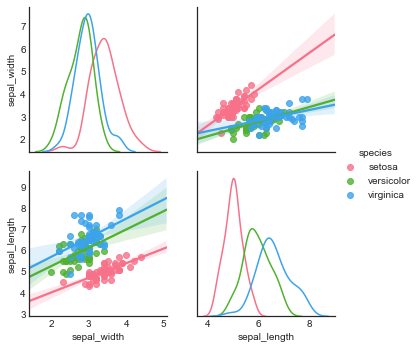

In [43]:
#只提取部分变量
g = sns.pairplot(iris, vars = ['sepal_width', 'sepal_length'],
             kind = 'reg', diag_kind = 'kde',
             hue = 'species', palette = 'husl')

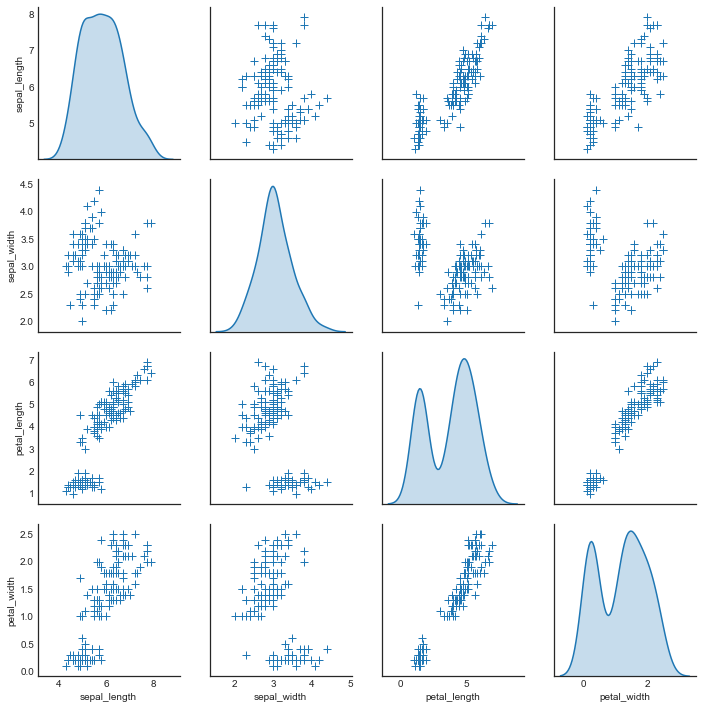

In [44]:
#其它参数设置
sns.pairplot(iris, diag_kind = 'kde', markers = '+',
             plot_kws = dict(s = 50, edgecolor = 'b', linewidth = 1),
             #设置点样式
             diag_kws = dict(shade = True)
             )#设置密度图样式

### 可拆分绘制的散点图

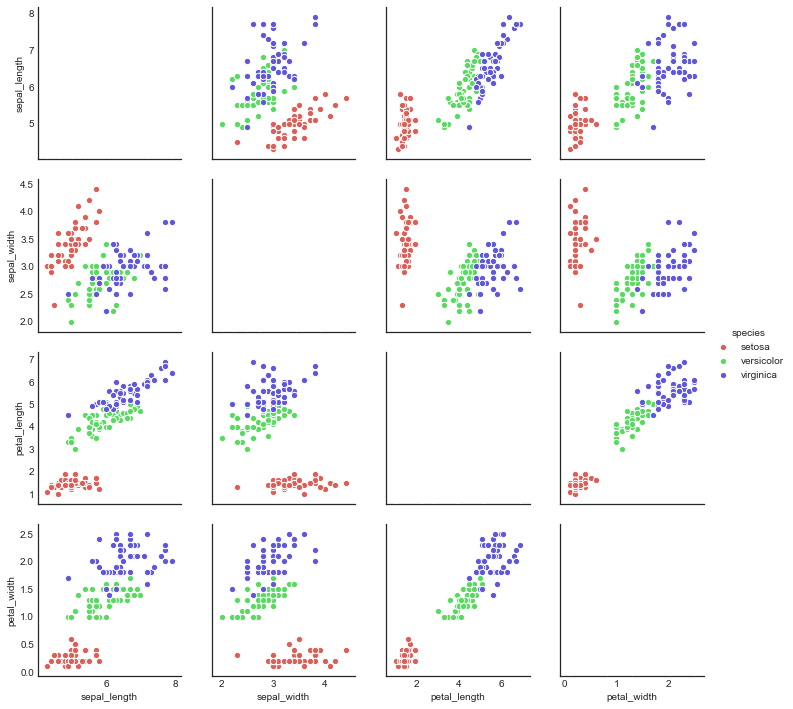

In [45]:
# map_diag() + map_offdiag()
g = sns.PairGrid(iris, hue= 'species', palette = 'hls',
                 vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
                #可筛选创建一个绘图表格区域，设置好x，y对应的数据，按照species分类
 
#对角线图表，plt.hist/sns.kdeplot
g.map_diag(plt.hist,
           histtype = 'step', #可选：'bar','barstacked', 'step', 'stepfilled'
           linewidth = 1, edgecolor = 'w')
 
#其它图表：plt.scatter/plt.bar...
g.map_offdiag(plt.scatter, edgecolor = 'w', s = 40, linewidth = 1)
#设置点颜色、大小、描边宽度
g.add_legend() #添加图例()

### 上三角和下三角#map_diag() + map_lower() + map_upper()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
D:\Anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


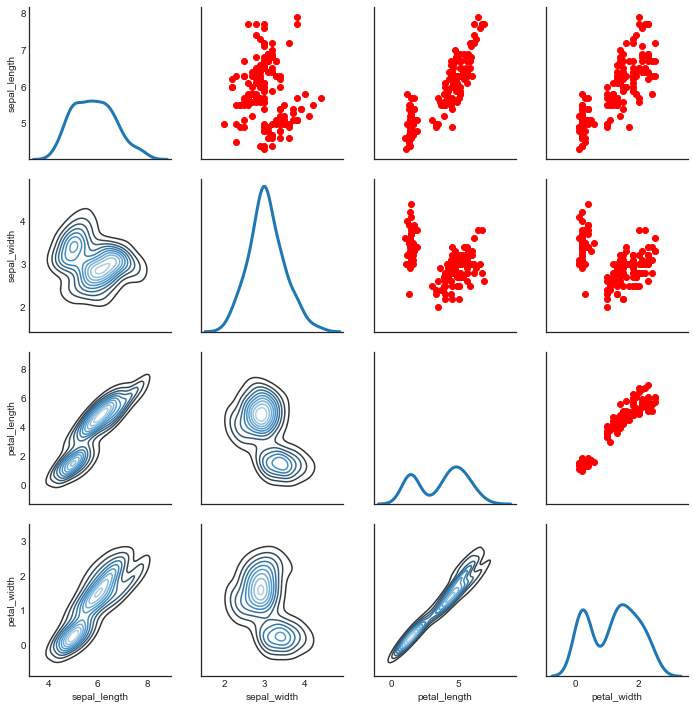

In [46]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot, lw=3) #设置对角线图表
g.map_upper(plt.scatter, color = 'r')  #设置对角线上端图表
g.map_lower(sns.kdeplot, cmap='Blues_d') #设置对角线下端图表